Pre-processing 


In [32]:
import pandas as pd

df = pd.read_csv("/workspaces/projectsummer/project csv.csv", header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,NaN,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,...,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31,2014-12-31
1,报告期,三季报,中报,一季报,年报,三季报,中报,一季报,年报,三季报,...,一季报,年报,三季报,中报,一季报,年报,三季报,中报,一季报,年报
2,报表类型,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,...,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表
3,营业收入,"7,198,300","4,680,100","2,130,100","9,677,300","7,160,600","4,825,600","2,332,900","8,146,200","5,714,400",...,"269,627","700,013","471,550","241,707","114,705","404,603","283,165","189,486","93,988","319,836"
4,产品,"7,198,300","4,680,100","2,130,100","9,677,300","7,160,600","4,825,600","2,332,900","8,146,200","5,714,400",...,"269,627","700,013","471,550","241,707","114,705","404,603","283,165","189,486","93,988","319,836"


In [33]:
df.info

<bound method DataFrame.info of                          0           1           2           3           4   \
0                       NaN  2024-09-30  2024-06-30  2024-03-31  2023-12-31   
1                       报告期         三季报          中报         一季报          年报   
2                      报表类型        合并报表        合并报表        合并报表        合并报表   
3                      营业收入   7,198,300   4,680,100   2,130,100   9,677,300   
4                        产品   7,198,300   4,680,100   2,130,100   9,677,300   
..                      ...         ...         ...         ...         ...   
61                     其他地区         NaN         NaN         NaN         NaN   
62              2014年之前地区分类         NaN         NaN         NaN         NaN   
63                      NaN         NaN         NaN         NaN         NaN   
64                      NaN         NaN         NaN         NaN         NaN   
65                      NaN         NaN         NaN         NaN         NaN   

            5      

In [4]:
null_count = df.isna().count()
null_count

0     66
1     66
2     66
3     66
4     66
5     66
6     66
7     66
8     66
9     66
10    66
11    66
12    66
13    66
14    66
15    66
16    66
17    66
18    66
19    66
20    66
21    66
22    66
23    66
24    66
25    66
26    66
27    66
28    66
29    66
30    66
31    66
32    66
33    66
34    66
35    66
36    66
37    66
38    66
39    66
40    66
dtype: int64

In [28]:
#  用第0行作为真正的列名，第1行第2行为说明，剩下为数据
new_columns = df.iloc[0].tolist()
df_clean = df.iloc[3:].copy()
df_clean.columns = new_columns


In [29]:
#  设置第一列为指标列
first_column = df_clean.columns[0]
df_clean = df_clean.set_index(first_column)



In [30]:
#  处理列名为空格和转换为日期
df_clean.columns = [str(col).strip() for col in df_clean.columns]
date_columns = pd.to_datetime(df_clean.columns, errors='coerce')

In [31]:
#  保留有效日期列
valid_date_mask = ~date_columns.isna()
df_clean = df_clean.loc[:, valid_date_mask]
df_clean.columns = date_columns[valid_date_mask]


In [ ]:

#  转置
df_transposed = df_clean.T

#  转换数值格式
def to_float(val):
    try:
        return float(str(val).replace(",", ""))
    except:
        return pd.NA

df_transposed = df_transposed.applymap(to_float)

#  删除空列 & 保留非空值 ≥ 25 的指标
df_cleaned = df_transposed.dropna(axis=1, how='all')
df_final = df_cleaned.loc[:, df_cleaned.notna().sum() >= 25]

# 9. 输出确认
print("数据修复完成，预览如下：")
print(df_final.head())
print("数据结构：")
print(df_final.info())

✅ 数据修复完成，预览如下：
nan              营业收入         产品          汽车销售          汽车租赁          汽车监管信贷  \
2024-09-30  7198300.0  7198300.0     5382100.0      138000.0        207100.0   
2024-06-30  4680100.0  4680100.0     3499000.0       93400.0        133200.0   
2024-03-31  2130100.0  2130100.0     1646000.0       47600.0         44200.0   
2023-12-31  9677300.0  9677300.0     7850900.0      212000.0        179000.0   
2023-09-30  7160600.0  7160600.0     5787900.0      162000.0        135700.0   

nan                 储能          服务及其他收入         地区          美国          中国大陆  \
2024-09-30    702500.0         768600.0  7198300.0   3560200.0     1489300.0   
2024-06-30    464900.0         489600.0  4680100.0   2301800.0      922800.0   
2024-03-31    163500.0         228800.0  2130100.0    976200.0      459200.0   
2023-12-31    603500.0         831900.0  9677300.0   4523500.0     2174500.0   
2023-09-30    459700.0         615300.0  7160600.0   3347200.0     1564200.0   

nan         ...        

/tmp/ipykernel_5663/3102298471.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_transposed = df_transposed.applymap(to_float)


In [35]:
df_final.head()

nan,营业收入,产品,汽车销售,汽车租赁,汽车监管信贷,储能,服务及其他收入,地区,美国,中国大陆,...,毛利,产品,汽车销售,汽车租赁,储能,毛利率(%),产品,汽车销售,汽车租赁,储能
2024-09-30,7198300.0,7198300.0,5382100.0,138000.0,207100.0,702500.0,768600.0,7198300.0,3560200.0,1489300.0,...,1327100.0,1327100.0,821900.0,61900.0,186800.0,18.44,18.44,15.27,44.86,26.59
2024-06-30,4680100.0,4680100.0,3499000.0,93400.0,133200.0,464900.0,489600.0,4680100.0,2301800.0,922800.0,...,827400.0,827400.0,513100.0,42000.0,114300.0,17.68,17.68,14.66,44.97,24.59
2024-03-31,2130100.0,2130100.0,1646000.0,47600.0,44200.0,163500.0,228800.0,2130100.0,976200.0,459200.0,...,369600.0,369600.0,256300.0,20700.0,40300.0,17.35,17.35,15.57,43.49,24.65
2023-12-31,9677300.0,9677300.0,7850900.0,212000.0,179000.0,603500.0,831900.0,9677300.0,4523500.0,2174500.0,...,1766000.0,1766000.0,1338800.0,85200.0,114100.0,18.25,18.25,17.05,40.19,18.91
2023-09-30,7160600.0,7160600.0,5787900.0,162000.0,135700.0,459700.0,615300.0,7160600.0,3347200.0,1564200.0,...,1322200.0,1322200.0,996000.0,64800.0,82700.0,18.46,18.46,17.21,40.00,17.99


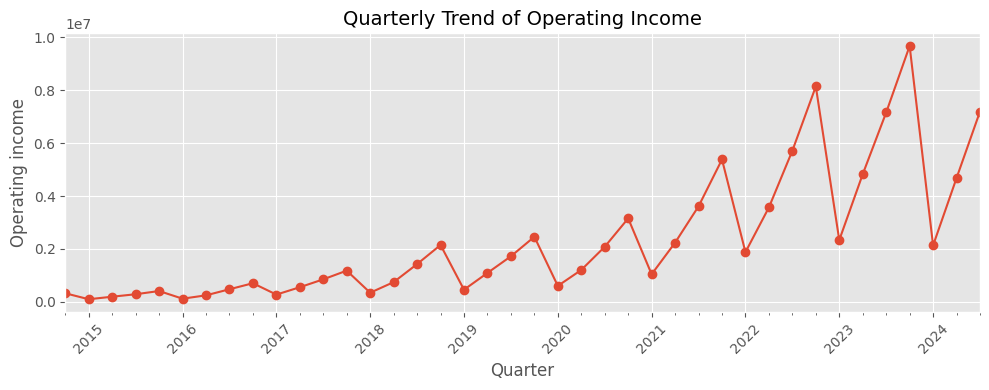

In [39]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
col_revenue = [col for col in df_final.columns if col.strip() == '营业收入'][0]

plt.figure(figsize=(10, 4))
df_final[col_revenue].plot(marker='o')
plt.title("Quarterly Trend of Operating Income", fontsize=14)
plt.ylabel("Operating income")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()